Simulating data points: 100%|██████████| 324/324 [00:11<00:00, 28.10it/s]


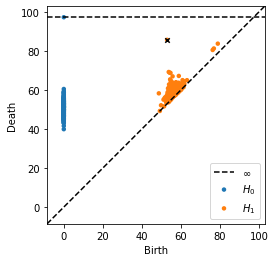

Decoding... done


In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

import sys
sys.path.insert(0, './Persistent_Homology')

from gratings import grating_model
from plotting import plot_data, plot_mean_against_index, show_feature
from persistence import persistence
from decoding import cohomological_parameterization, remove_feature
from noisereduction import PCA_reduction, z_cutoff



## Generate data
data = grating_model(Nn=8, Np=(18,1,18,1), deltaT=55) #, random_neurons=True

## Apply noise reduction
# data = PCA_reduction(data, 5)
# data = z_cutoff(data,2)

## Analyze shape
# persistence(data,homdim=2,coeff=2)
# persistence(data,homdim=2,coeff=3)

## Decode first parameter
decoding1 = cohomological_parameterization(data, coeff=23)
# show_feature(decoding1)
# plot_data(data,transformation="PCA", labels=decoding1,
#           colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])


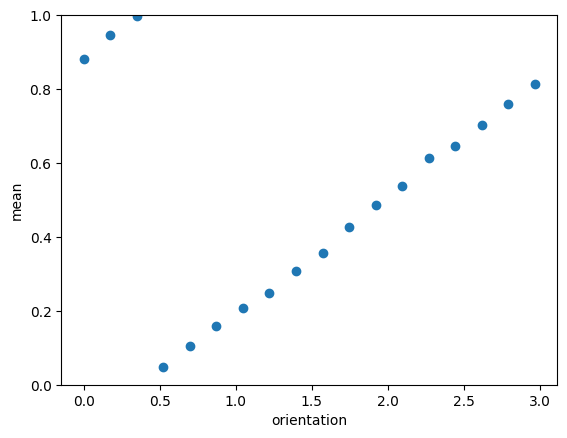

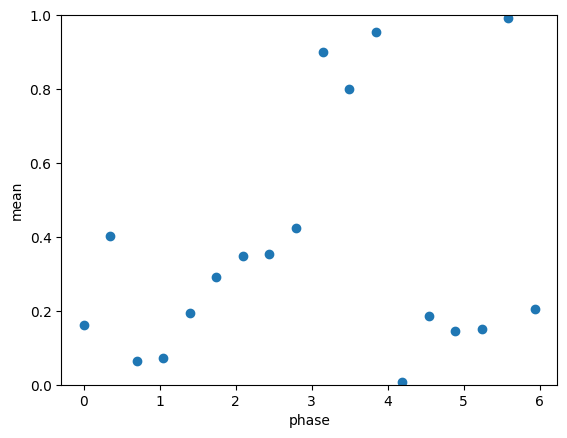

In [2]:
plot_mean_against_index(data,decoding1,"orientation")
plot_mean_against_index(data,decoding1,"phase")

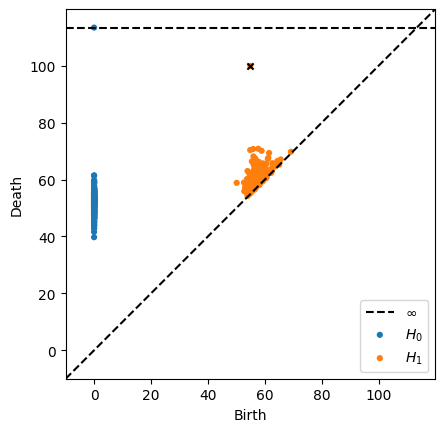

Decoding... done


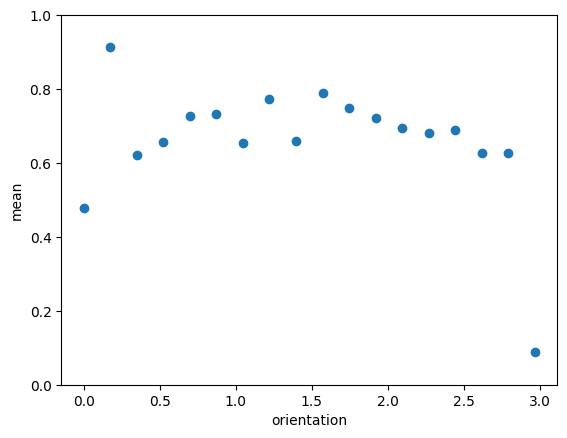

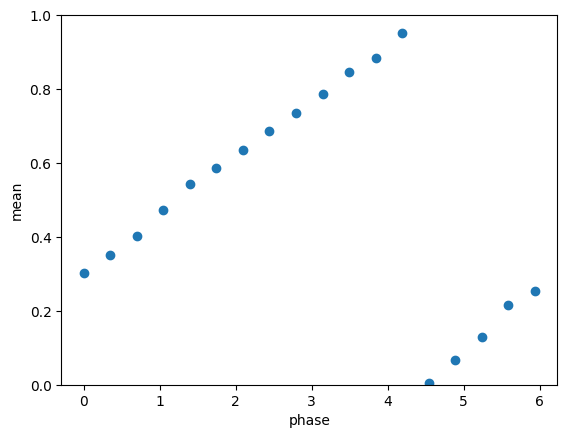

In [3]:
# Decode second parameter
reduced_data = remove_feature(data, decoding1, cut_amplitude=0.5)
decoding2 = cohomological_parameterization(reduced_data, coeff=23)
# show_feature(decoding2)
plot_mean_against_index(data,decoding2,"orientation")
plot_mean_against_index(data,decoding2,"phase")
# plot_data(data,transformation="PCA", labels=decoding2,
        #   colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])

In [4]:
# Klein bottle
R = 25
r = 12
N = 20
data_4D_klein_bottle = []
phase = np.linspace(0,2*np.pi, N)
orientation = np.linspace(0, np.pi, N)
for phi in phase:
    for theta in orientation:
        x1 = (R + r*np.cos(phi)) *np.cos(2*theta)
        x2 = (R + r*np.cos(phi)) *np.sin(2*theta)
        x3 = r*np.sin(phi)*np.cos(theta)
        x4 = r*np.sin(phi)*np.sin(theta)
        data_4D_klein_bottle.append([x1, x2, x3, x4])

In [5]:
# Klein bottle
R = 25
P = 8
N = 20
eps = 0.8
data_4D_klein_bottle = []
phis = np.linspace(0,2*np.pi, N)
vs = np.linspace(0, 2*np.pi, N)
param = []
for phi in phis:
    for v in vs:
        param.append([phi, v])
        x1 = R * (np.cos(phi/2) * np.cos(v) - np.sin(phi/2)*np.sin(2*v))
        x2 = R * (np.sin(phi/2) * np.cos(v) + np.cos(phi/2)*np.sin(2*v))
        x3 = P*np.cos(phi)*(1 + eps * np.sin(v))
        x4 = P*np.sin(phi)*(1 + eps * np.sin(v))
        data_4D_klein_bottle.append([x1, x2, x3, x4])
        


$x_1 = (R + r\cos(\phi))\cos(\theta),\\
 x_2 = (R + r\cos(\phi))\sin(\theta),\\
 x_3 = r\sin(\phi)\cos(\theta/2)\\
 x_4 = r\sin(\phi)\sin(\theta/2) $

4D non-intersecting parametrization
$ x1 = R(\cos(\phi/2) \cos(v) - \sin(\phi/2) \sin(2v)) \\
x2 = R(\sin(\phi/2) \cos(v) + \cos(\phi/2) \sin(2v)) \\
x3 = P\cos(\phi)(1+\epsilon \sin(v))\\
x4 = P\sin(\phi])(1+\epsilon \sin(v))
$

In [6]:
data_4D_klein_bottle = pd.DataFrame(np.array(data_4D_klein_bottle))
param = np.array(param)

In [7]:
data_4D_klein_bottle.shape

(400, 4)

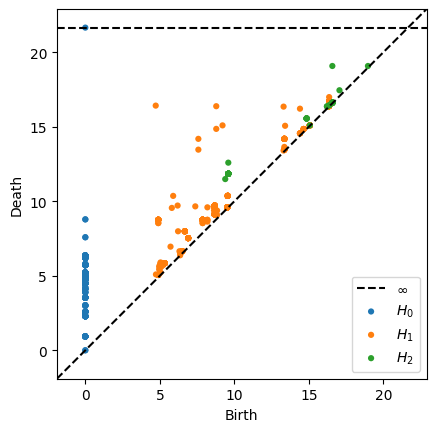

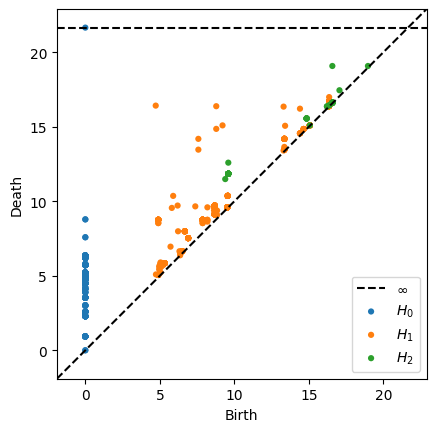

In [8]:

## Apply noise reduction
# data = PCA_reduction(data, 5)
# data = z_cutoff(data,2)

## Analyze shape
persistence(data_4D_klein_bottle,homdim=2,coeff=2)
persistence(data_4D_klein_bottle,homdim=2,coeff=3)

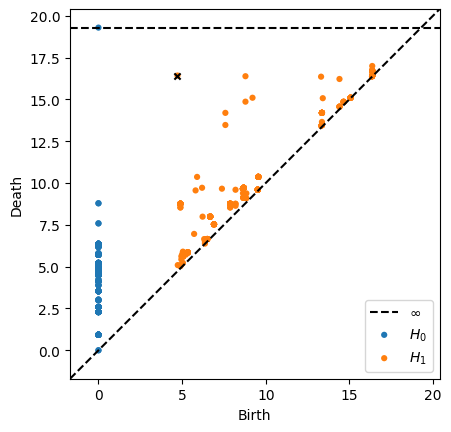

Decoding... done


In [9]:
## Decode first parameter
decoding1 = cohomological_parameterization(data_4D_klein_bottle, coeff=23)
# show_feature(decoding1)
# plot_mean_against_index(data_4D_klein_bottle,decoding1)
# plot_mean_against_index(data,decoding1,"phase")
# plot_data(data,transformation="PCA", labels=decoding1,
#           colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])


In [10]:
import matplotlib.pyplot as plt

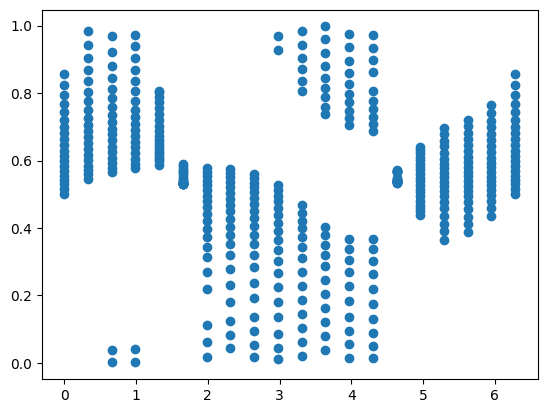

In [11]:
plt.scatter(param[:,1], decoding1['decoding'][:])

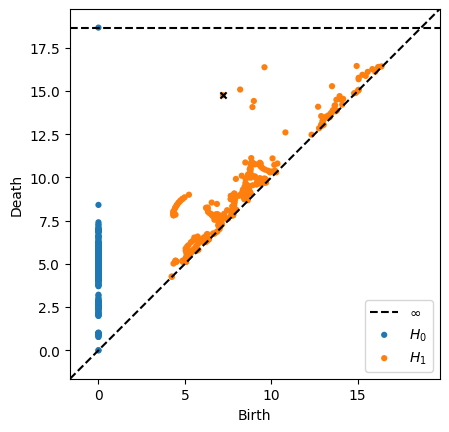

Decoding... done


In [12]:

## Decode second parameter
reduced_data = remove_feature(data_4D_klein_bottle, decoding1, cut_amplitude=0.5)
decoding2 = cohomological_parameterization(reduced_data, coeff=23)
# show_feature(decoding2)
# plot_mean_against_index(data,decoding2,"orientation")
# plot_mean_against_index(data,decoding2,"phase")
# plot_data(data,transformation="PCA", labels=decoding2,
#           colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])


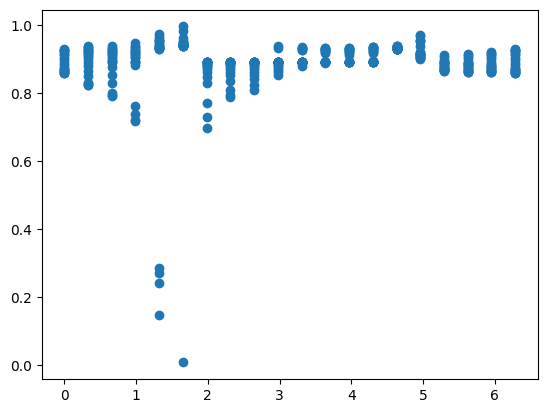

In [13]:
plt.scatter(param[:,1], decoding2['decoding'])

In [25]:

N = 10
radius = 10
theta_range = np.linspace(0, 2* np.pi, 20)
data_circle = [[radius*np.cos(theta), radius*np.sin(theta)] for theta in theta_range]

In [26]:
data_circle = pd.DataFrame(np.array(data_circle))

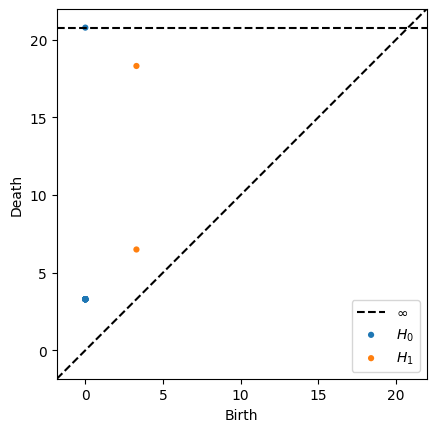

In [27]:
persistence(data_circle, homdim=1, coeff=2)

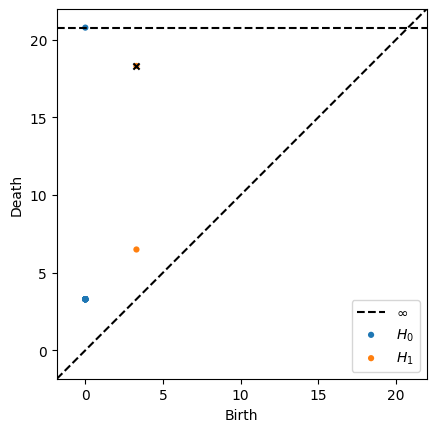

Decoding... done


In [28]:
decoding1 = cohomological_parameterization(data_circle, coeff=25)

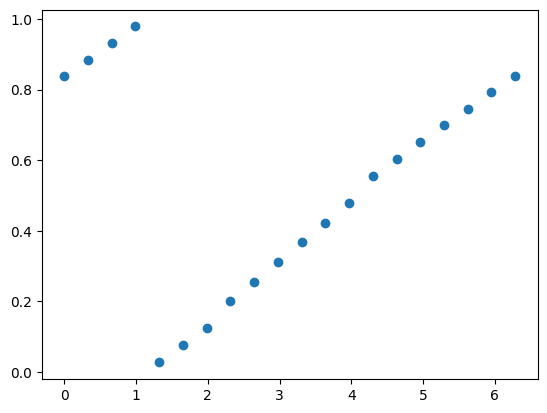

In [22]:
plt.scatter(theta_range, decoding1['decoding'])

Source manifold: coordinates to natural embedding
obser

source_manifold
open_cover
patch
set of patches
coordinate system for each patch
observed_embedding
homologies give us better candidates for meaningful coordinates

In [ ]:
def circle(theta):
    
def torus(theta, phi):

def klein_bottle(theta, phi):

def sphere(theta, phi):


In [ ]:
# -*- coding: utf-8 -*-
    
def hausdorff(data1, data2, homdim, coeff):
    """Hausdorff metric between two persistence diagrams"""
    dgm1 = (ripser.ripser(data1,maxdim=homdim,coeff=coeff))['dgms']
    dgm2 = (ripser.ripser(data2,maxdim=homdim,coeff=coeff))['dgms']
    distance = directed_hausdorff(dgm1[homdim], dgm2[homdim])[0]
    return distance

@multi_input
def confidence(X, alpha=0.05, Nsubsamples=20, homdim=1, coeff=2):
    """
    Compute the confidence interval of the persistence diagram of a dataset
    
    Computation done by subsampling as in arxiv:1303.7117
    
    Parameters
    ----------
    X: dataframe(n_datapoints, n_features):
        Dataframe containing the data
    alpha : float between 0 and 1, optional, default 0.05
        1-alpha is the confidence
    Nsubsamples : int, optional, default 20
        The number of subsamples
    homdim : int, optional, default 1
        The dimension of the homology
    coeff : int prime, optional, default 2
        The coefficient basis
    """
    N = X.shape[0]
    distances = np.zeros(Nsubsamples)
    iterator = trange(0, Nsubsamples, position=0, leave=True)
    iterator.set_description("Computing confidence interval")
    for i in iterator:
        subsample = X.iloc[np.random.choice(N, N, replace=True)] # replace = False
        distances[i] = hausdorff(X, subsample, homdim, coeff)
    distances.sort()
    confidence = np.sqrt(2) * 2 * distances[int(alpha*Nsubsamples)]
    return confidence

@multi_input
def persistence(X, homdim=1, coeff=2, threshold=float('inf'),
                show_largest_homology=0, distance_matrix=False, Nsubsamples=0,
                alpha=0.05, cycle=None, save_path=None):
    """
    Plot the persistence diagram of a dataset using ripser

    Also prints the five largest homology components
    
    Parameters
    ----------
    X: dataframe(n_datapoints, n_features):
        Dataframe containing the data
    homdim : int, optional, default 1
        The dimension of the homology
    coeff : int prime, optional, default 2
        The coefficient basis
    threshold : float, optional, default infinity
        The maximum distance in the filtration
    show_largest_homology: int, optional, default 0
        Print this many of the largest homology components
    distance_matrix : bool, optional, default False
        When true X will be interepreted as a distance matrix
    Nsubsamples : int, optional, default 0
        The number of subsamples used in computing the confidence interval
        Does not compute the confidence interval when this is 0
    alpha : float between 0 and 1, optional, default 0.05
        1-alpha is the confidence
    cycle : int, optional, default None
        If given highlight the homology component in the plot corresponding to
        this cycle id
    save_path : str, optional, default None
        When given save the plot here
    """
    result = ripser.ripser(X, maxdim=homdim, coeff=coeff, do_cocycles=True,
                           distance_matrix=distance_matrix, thresh=threshold)
    diagrams = result['dgms']
    plot_diagrams(diagrams, show=False)
    if (Nsubsamples>0):
        conf = confidence(X, alpha, Nsubsamples, homdim, 2)
        line_length = 10000
        plt.plot([0, line_length], [conf, line_length + conf], color='green',
                 linestyle='dashed',linewidth=2)
    if cycle is not None:
        dgm1 = diagrams[1]
        plt.scatter(dgm1[cycle, 0], dgm1[cycle, 1], 20, 'k', 'x')
    if save_path is not None:
        path = save_path + 'Z' + str(coeff)
        if (Nsubsamples>0):
            path += '_confidence' + str(1-alpha)
        path += '.png'
        plt.savefig(path)
    plt.show()
    
    if show_largest_homology != 0:
        dgm = diagrams[homdim]
        largest_indices = np.argsort(dgm[:, 0] - dgm[:, 1])
        largest_components = dgm[largest_indices[:show_largest_homology]]
        print(f"Largest {homdim}-homology components:")
        print(largest_components)
    return

@multi_input
def persistence_witness(X, number_of_landmarks=100, max_alpha_square=0.0,
                        homdim=1):
    """
    Plot the persistence diagram of a dataset using gudhi

    Uses a witness complex allowing it to be used on larger datasets
    
    Parameters
    ----------
    X: dataframe(n_datapoints, n_features):
        Dataframe containing the data
    number_of_landmarks : int, optional, default 100
        The number of landmarks in the witness complex
    max_alpha_square : double, optional, default 0.0
        Maximal squared relaxation parameter
    homdim : int, optional, default 1
        The dimension of the homology
    """
    print("Sampling landmarks...", end=" ")
    
    witnesses = X.to_numpy()
    landmarks = gudhi.pick_n_random_points(
        points=witnesses, nb_points=number_of_landmarks
    )
    print("done")
    message = (
        "EuclideanStrongWitnessComplex with max_edge_length="
        + repr(max_alpha_square)
        + " - Number of landmarks="
        + repr(number_of_landmarks)
    )
    print(message)
    witness_complex = gudhi.EuclideanStrongWitnessComplex(
        witnesses=witnesses, landmarks=landmarks
    )
    simplex_tree = witness_complex.create_simplex_tree(
        max_alpha_square=max_alpha_square,
        limit_dimension=homdim
    )
    message = "Number of simplices=" + repr(simplex_tree.num_simplices())
    print(message)
    diag = simplex_tree.persistence()
    print("betti_numbers()=")
    print(simplex_tree.betti_numbers())
    gudhi.plot_persistence_diagram(diag, band=0.0)
    plt.show()
    return
